In [1]:
#IMPORTS
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch

#importing custom files#
sys.path.append('../src/')
from model import DeepONet
from optim import train_DON

from data_gen import exact

In [2]:
#loading
data_train = np.load("train.npz",allow_pickle=True)

In [3]:
#getting the data#
branch = data_train['branch']
trunk = data_train['trunk']
y = data_train['y']

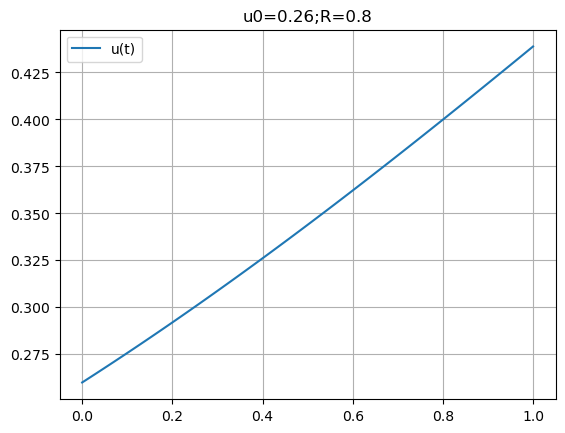

In [4]:
#ploting logistic equation solutions#

#plotting some of the functions#
i = 90 #function index#
xspan = trunk.flatten()

u0,R = branch[i,:]
plt.plot(xspan,y[i,:],label='u(t)')
plt.title(f'u0={u0};R={R}')
plt.grid()
plt.legend(loc='best')

In [5]:
#creating model#
model = DeepONet(n_branch=2,width=40,depth=1,p=40,act=torch.relu)

In [6]:
#training model#
train_DON(model,branch,trunk,y,epochs=1000,log=False)

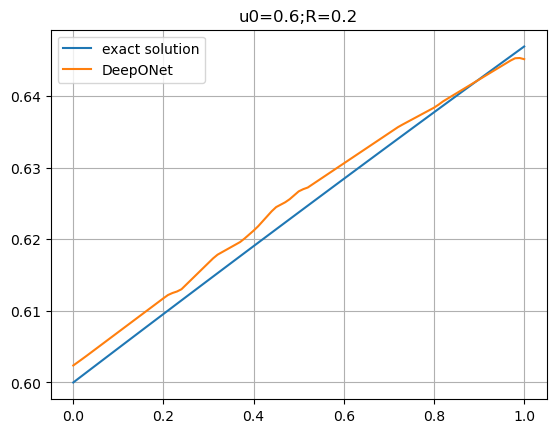

In [9]:
#plotting some of the functions#

xspan = trunk.flatten()

u0 = 0.6
R = 0.2
u = model.forward(np.array([u0,R]),trunk).detach()
u = u.numpy().flatten()

u_exact = exact(xspan,u0,R)

plt.plot(xspan,u_exact,label='exact solution')
plt.plot(xspan,u,label='DeepONet')
plt.title(f'u0={u0};R={R}')
plt.grid()
plt.legend(loc='best')

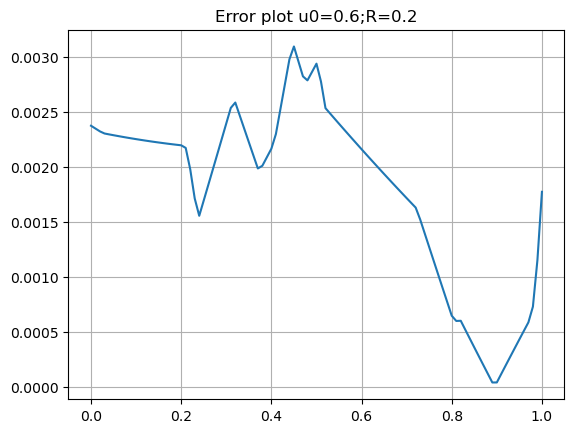

In [10]:
#plotting some of the functions#
error = np.abs(u_exact-u)
plt.plot(xspan,error)
plt.title(f'Error plot u0={u0};R={R}')
plt.grid()